# Hitchhiker's guide to Vector Semantics

## CountVectorizer&  TF-IDF Vectorizer

CountVectorizer и TfidfVectorizer - это два популярных метода преобразования текстовых данных в числовые векторы для использования в алгоритмах машинного обучения. Вот объяснение, как они работают:

**CountVectorizer**
CountVectorizer преобразует текстовые данные в разреженную матрицу, где каждый столбец представляет счетчик частоты появления каждого слова из словаря в каждом текстовом документе.

- Токенизация: Входной текст разделяется на отдельные токены или слова. Обычно, токенизация осуществляется путем разделения текста по пробелам или знакам пунктуации.

- Построение словаря: CountVectorizer строит словарь, состоящий из уникальных слов, встречающихся во всем корпусе текстов. Каждое уникальное слово получает уникальный индекс в словаре.

- Подсчет частоты: Для каждого текстового документа CountVectorizer подсчитывает частоту появления каждого слова из словаря. Результатом является матрица, где каждая строка соответствует текстовому документу, а каждый столбец соответствует слову из словаря. Значение в ячейке матрицы представляет счетчик частоты появления данного слова в данном текстовом документе.

**TfidfVectorizer**
TfidfVectorizer также преобразует текстовые данные в разреженную матрицу, но в отличие от CountVectorizer, он учитывает не только частоту появления слова в документе, но и важность слова в контексте всего корпуса.

- Токенизация: Аналогично CountVectorizer, входной текст разделяется на токены или слова.

- Подсчет TF (Term Frequency): TfidfVectorizer подсчитывает TF - частоту появления каждого слова в каждом текстовом документе. Это делается путем подсчета относительной частоты каждого слова в документе.

- Подсчет IDF (Inverse Document Frequency): Затем TfidfVectorizer подсчитывает IDF - инверсную частоту документа. IDF представляет важность слова в контексте всего корпуса текстовых документов. Слова, которые появляются во многих документах, получают низкое значение IDF, тогда как слова, которые появляются редко, получают высокое значение IDF.

- Взвешивание TF-IDF: TF-IDF для каждого слова в каждом текстовом документе вычисляется путем умножения значения TF (частоты слова в документе) на значение IDF (инверсной частоты документа). Это позволяет отразить важность слова не только внутри документа, но и в контексте всего корпуса текстов.

- Нормализация: Векторы TF-IDF могут быть нормализованы для получения нормализованных TF-IDF векторов. Это обычно делается с использованием L2-нормы, где значения вектора делятся на его евклидову норму. Нормализация помогает уравновесить значения между различными текстовыми документами.

CountVectorizer и TfidfVectorizer позволяют преобразовывать текстовые данные в числовые векторы, что облегчает использование текста в алгоритмах машинного обучения. CountVectorizer представляет каждое слово в виде счетчика его частоты, а TfidfVectorizer учитывает как частоту, так и важность слова в контексте всего корпуса. Оба метода полезны для задач, связанных с анализом текста, классификацией текстовых данных и поисковыми запросами.

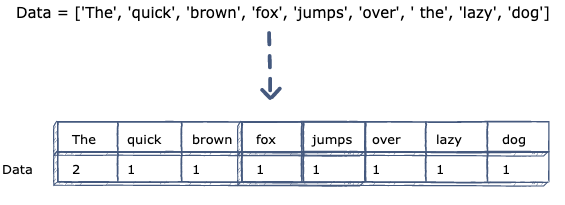

## Word2Vec

Word2Vec: Предложенный [Томашем Миколовым](https://en.wikipedia.org/wiki/Tom%C3%A1%C5%A1_Mikolov) и др. в 2013 году, Word2Vec - это модель на основе неглубоких нейронных сетей, которая изучает векторные представления слов путем предсказания контекста слов. <br>
Как это работает:
```Представьте себе квадратную таблицу, в которой каждая строчка — это какое-то слово из словаря большого текстового корпуса. Они идут по порядку: абажур — первая строчка, Абакан — вторая, ящур — последняя. Столбцы — это те же самые слова, и они тоже идут по порядку. В ячейке на пересечении столбца и строки пишется число раз, которое слово из строки встретилось в корпусе рядом со словом из столбца. ```
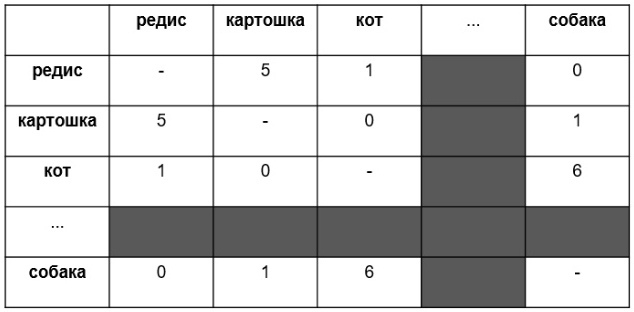


А вот статьи, объясняющие как работает W2V: 
-[на русском](https://vk.com/@sysblok-word2vec-pokazhi-mne-svoi-kontekst-i-ya-skazhu-kto-ty)
- [на английском](https://www.baeldung.com/cs/word-embeddings-cbow-vs-skip-gram)

У Word2Vec есть две альтернативные стратегии обучения модели: 
- Continuous Bag-of-Words (CBOW)
- Skip-gram

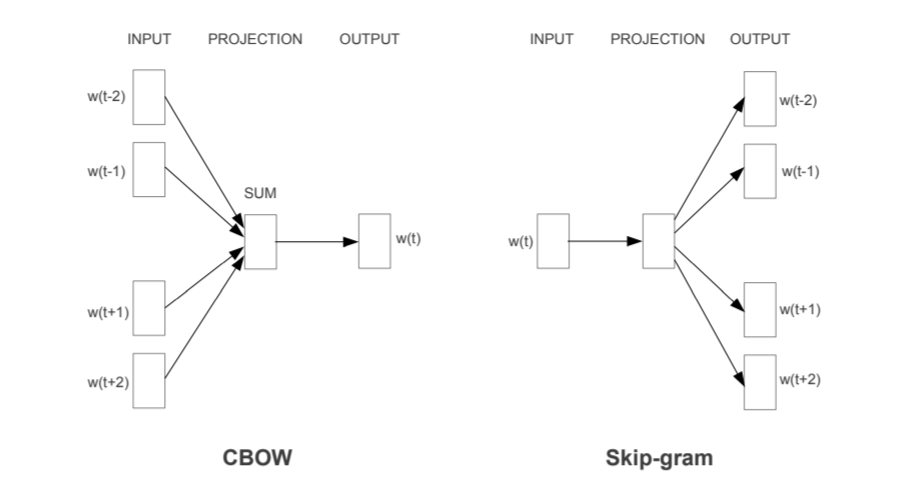

**CBOW (Continuous Bag-of-Words):** Подходит для предсказания целевого слова на основе контекста, окружающего это слово. Для обучения модели CBOW используется окно контекста, в котором слово находится в центре окна, а окружающие слова служат входными данными. Задача модели CBOW - предсказать целевое слово на основе входных слов контекста. Путем обучения модель пытается найти наиболее вероятное представление целевого слова, и это представление становится его эмбеддингом(векторным представлением).

**SkipGram:** Модель использует целевое слово для предсказания контекстных слов. Значение эмбеддинга(векторного представления) слова в модели SkipGram определяется его способностью предсказывать соседние слова.

Как CBOW, так и SkipGram - это две альтернативные стратегии обучения модели Word2Vec. CBOW обычно обучается быстрее, особенно при большом объеме данных, но SkipGram лучше справляется с редкими словами и имеет тенденцию улавливать лучше семантические отношения между словами. Оба подхода имеют свои преимущества и используются в различных сценариях в зависимости от задачи и типа данных.

### Doc2vec

Doc2Vec - это модель, развитая на основе Word2Vec, которая позволяет генерировать векторные представления уже не отдельных слов, а сразу целых документов (предложения, абзацы, тексты).
Есть два варианта модели для D2V:

1. Distributed Memory Model of Paragraph Vectors (PV-DM): В модели PV-DM, каждый документ представляется вектором фиксированной длины. Этот вектор представляет среднее значение эмбеддингов всех слов в документе, а также контекстный вектор, полученный из модели Word2Vec, который предсказывает целевое слово на основе контекста в документе.

2. Distributed Bag of Words (PV-DBOW): В модели PV-DBOW каждый документ представляется только собственным вектором, не учитывая контекстных слов. Модель PV-DBOW обучается предсказывать случайно выбранное слово из документа, используя только вектор документа.

Оба варианта модели Doc2Vec позволяют генерировать векторные представления для документов. Они позволяют сопоставить каждому документу компактное векторное представление в пространстве эмбеддингов, улавливая семантические особенности и контекст документа. Эти векторные представления можно использовать для различных задач обработки текста, таких как кластеризация документов, классификация текстов или поиск похожих документов.

## GloVe

**Global Vectors for Word Representation (GloVe):** Введенный [Pennington и др. в 2014 году](https://paperswithcode.com/method/glove), GloVe - это еще одна популярная модель для создания эмбеддингов (векторных представлений) слов. 

Чтобы создать эмбеддинги слов,  модель сочетает глобальную статистику совместного появления слов в корпусе с локальной статистикой появления слов со своими соседями в рамках "окна контекста"

### Чем GloVe отличается от Word2Vec?

Быстрый ответ:
- контекстом (w2v использует локальный контекст, GloVe -- глобальный и локальный)
- архитектурой моделей и алгоритмами обучения: w2v -- это 3-х слойная нейросеть, а механизм GloVe основан на факторизации матриц

Подробный ответ [есть в этой статье](https://machinelearninginterview.com/topics/natural-language-processing/what-is-the-difference-between-word2vec-and-glove/)

## FastText

fastText: Разработанный исследователями Facebook AI Research в 2016 году, fastText - это расширение модели Word2Vec, которое работает с подсловными единицами. Она изучает векторные представления слов не только для целых слов, но и для символьных n-грамм, что позволяет ей работать с редкими словами и улавливать морфологическую информацию.

У нас есть [целая тетрадка где можно попобовать поработать с эмбеддингами W2V и FastText](./VecSem_Part1.ipynb)

## ELMO

До сих пор мы с вами говорили о **"статических" моделях** (‘static word embeddings’). И word2vec, и fastText и GloVe — статические модели. Т.е. в них **один раз обучается набор эмбеддингов** для каких-то текстовых единиц (слово или часть слова... условно назовем это токеном). И дальше мы работаем с таблицей эмбеддингов. 

У такого подхода есть очевидные **проблемы**: например, **полисемия**. Скорее всего, на этапе обучения мы смешаем разные значения слова в один вектор — и дальше всегда будем пихать именно его. В идеале нужно, чтобы эмбеддинг слова "мышь" частично зависел от того, как в принципе употребляется слово, но частично — и от текущего контекста. 

<img src='http://ai.stanford.edu/blog/assets/img/posts/2020-03-24-contextual/contextual_mouse_transparent_1.png'>

В районе 2018-2019 произошел бум т.н. "контекстуализированных" моделей: ELMo, BERT, GPT-3, которые реализуют этот подход. В них эмбеддинг каждого слова зависит еще и от контекста, в котором оно употреблено. Следовательно, у нас уже нет никакой готовой единой таблицы эмбеддингов. Есть модель, которая на лету генерирует эмбеддинги каждого слова с учетом текущего контекста. 

<img src='http://ai.stanford.edu/blog/assets/img/posts/2020-03-24-contextual/contextual_mouse_transparent_2.png'>

🚀 И это оказалось просто killer feature с точки зрения инженерии: на контекстуализированных эмбеддингах станадртные задачи NLP стали решаться гораздо лучше, чем на статических до этого! (это связано не только с использвоанием контекстуализированных эмбеддингов, там сыграла свою роль удачная неросетевая архитектура Transformer, позволяющая обучить сеть на очень большом корпусе, а также наличие такового корпуса)

ELMo (Embeddings from Language Models): Предложенный Peters и др. в 2018 году, ELMo - это модель глубокого контекстуализированного векторного представления слов. Она генерирует представления слов, учитывая всю входную предложение и улавливает вариации значения слов в зависимости от контекста, в котором они появляются.

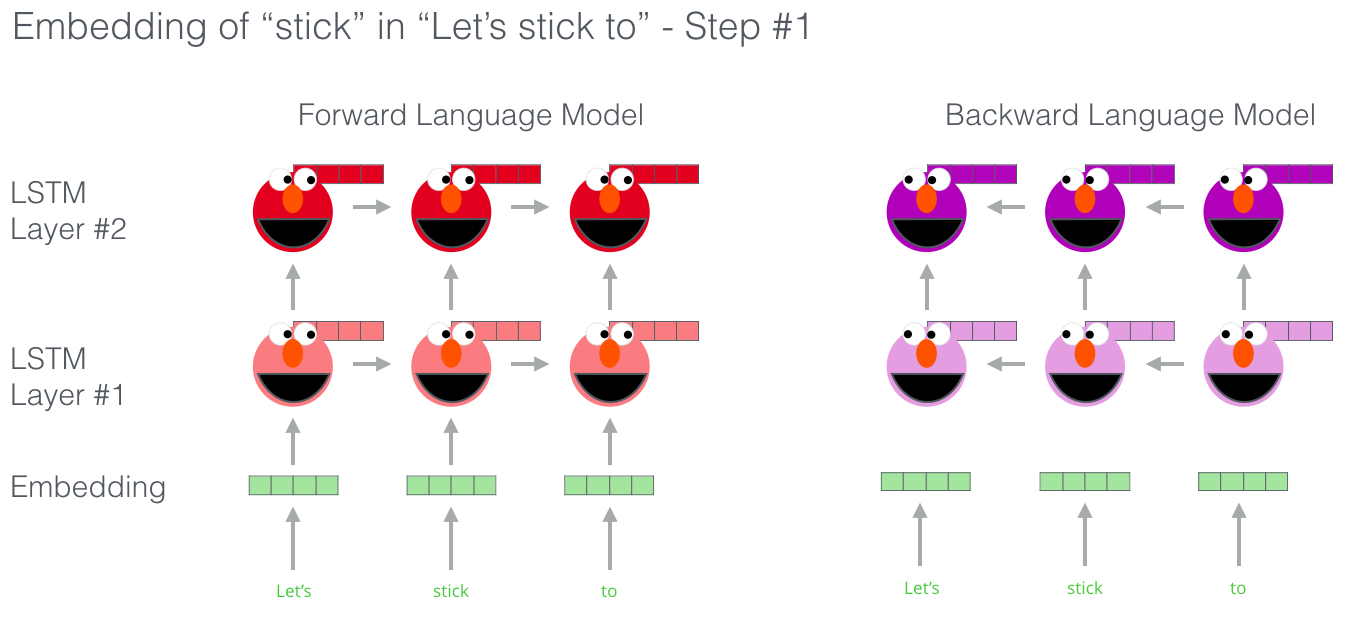

А вот несколько ссылок от команды RusVectores с практическим применением ELMo:



*   [Генерация векторов слов для корпуса из файла на диске](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/get_elmo_vectors.py)
*   [Оценка качества модели на задаче классификации текстов](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/text_classification.py)
*   [Оценка качества модели на задаче word sense disambiguation](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/wsd_eval.py)



## Transformer-based Models (BERT, GPT, etc.)

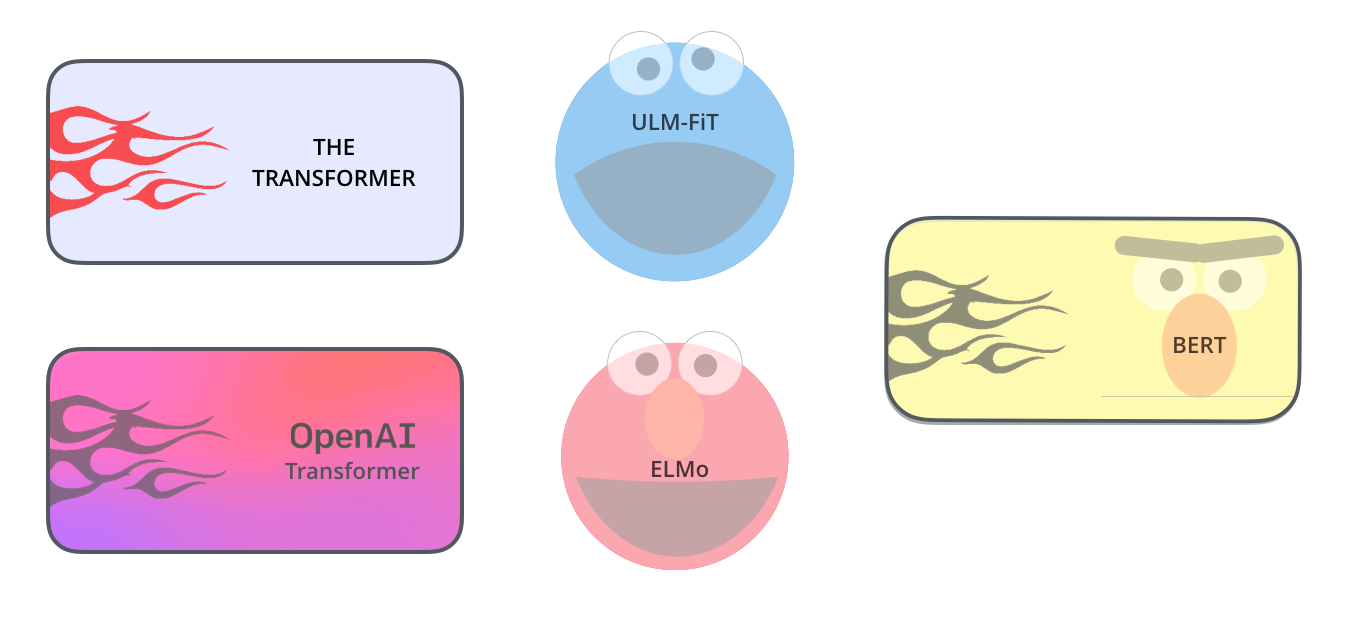

Модели на основе трансформеров (BERT, GPT): BERT (Bidirectional Encoder Representations from Transformers) и GPT (Generative Pre-trained Transformer) - это две влиятельные модели, представленные соответственно в 2018 и 2019 году. Эти модели используют архитектуру трансформера и предварительное обучение на больших корпусах текста

## BERT

BERT (Bidirectional Encoder Representations from Transformers) - это модель глубокого обучения, которая использует трансформерную архитектуру для представления слов и текстов. Она обучается на больших объемах текстовых данных, предсказывая отсутствующие слова в контексте окружающих их слов. BERT способен улавливать контекстуальные зависимости в предложениях, благодаря использованию двунаправленного подхода, который позволяет модели смотреть как влево, так и вправо по тексту. Полученные векторные представления от BERT могут быть использованы для широкого спектра задач обработки естественного языка, включая классификацию текста, анализ тональности и вопросно-ответные системы.

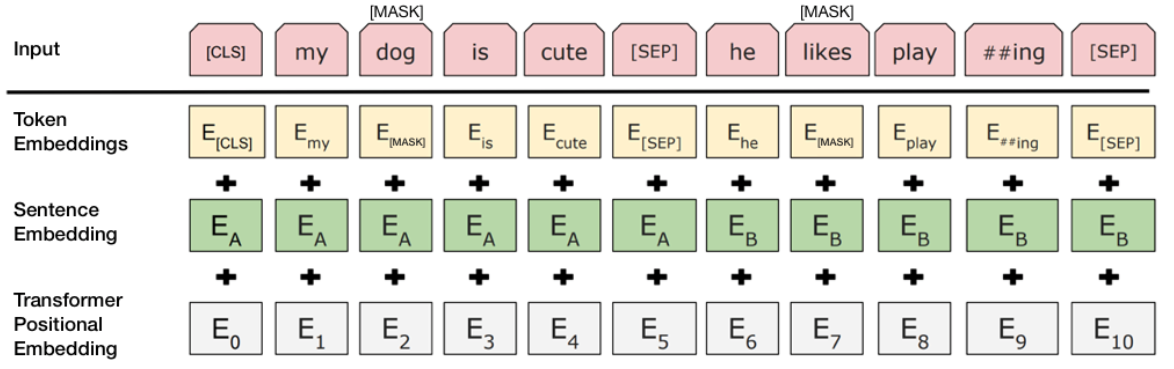

А вот [тетрадка](https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=q-dDVmXAA3At) с примером использования BERT, чтобы получить эмбеддинги слов и предложений

## XLNet

XLNet: Предложенная Янгом и др. в 2019 году, XLNet - это еще одна модель на основе трансформера, которая преодолевает ограничения предыдущих моделей с помощью обучения на основе перестановок. Она рассматривает все возможные перестановки входной последовательности, чтобы улавливать зависимости между всеми позициями, что приводит к лучшим векторным представлениям слов.

## RoBERTa

Представленная Лю и др. в 2019 году, RoBERTa - это вариант модели BERT, который оптимизирует процесс предварительного обучения(pre-training). Он удаляет определенные цели обучения и продлевает длительность предварительного обучения, что приводит к улучшенным векторным представлениям слов.


А еще есть:  

- RuBERT
- CamemBERT

## ELECTRA: 

Предложенная Кларком и др. в 2020 году, ELECTRA (Efficiently Learning an Encoder that Classifies Token Replacements Accurately) - это модель, которая использует схему General Adversarial Networks (GAN) для изучения векторных представлений слов путем замены и предсказания маскированных токенов.

## T5

Представленная Раффелом и др. в 2019 году, T5(T5 (Text-To-Text Transfer Transformer) - это универсальная модель трансформера для преобразования текста в текст, которая может быть донастроена для различных задач обработки естественного языка (в том числе генерацию векторных представлений слов)
- [репозиторий](https://huggingface.co/docs/transformers/model_doc/t5)

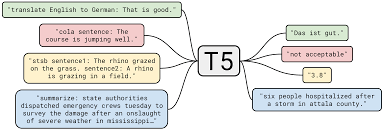


Обратите внимание, что этот список не является исчерпывающим, и с течением времени было разработано множество других моделей векторных представлений слов и их вариаций.

## Мультимодальный поворот

Мультимодальные архитектуры учат семантические связи между различными модальностями, такими как текст и изображения, путем совместного обучения их векторных представлений. 

Мультимодальные архитектуры позволяют объединять текстовую и визуальную информацию, обеспечивая изучение богатых кросс-модальных представлений. Совместное вложение текста и изображений в этих моделях облегчает задачи, требующие понимания и рассуждений между различными модальностями, такие как генерация описаний изображений, ответы на вопросы по изображению и мультимодальный анализ эмоций.

## CLIP

Вообще CLIP умеет работать [и с текстами,  и с изображениями](https://github.com/jina-ai/clip-as-service) 


Вот так, например, можно получать эмбеддинги предложений:

Сначала установим нужные библиотеки

In [13]:
!pip install clip-server 
!pip install clip-client 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 767.9 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:001.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 774.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.1/277.1 kB 1.0 MB/s eta 0:00:001.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.0/658.0 kB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 2.2 MB/s eta 0:00:00
  Install

Теперь запустим сервер

In [ ]:
!python3 -m clip_server 
# эту команду лучше запустить из  терминала, так подключение происходит быстрее

Готово, можно импортить и эмбеддить

In [18]:
from clip_client import Client

c = Client('grpc://0.0.0.0:51000')

In [22]:
text = """A dessert very similar to the lemon tart is the lemon pie, usually served for dessert, made with a crust usually made of shortcrust pastry and lemon custard filling. The lemon pie is prepared with a bottom pie crust. This pie is different from the lemon meringue pie, which has meringue on top. No upper crust is used, as in a cherry pie.""".split(".")

' No upper crust is used, as in a cherry pie'

In [31]:
encoded_text = c.encode(text)

print(encoded_text.shape)

(4, 512)


In [35]:
encoded_text[0]

array([-2.09611312e-01,  1.54532507e-01, -3.90132338e-01,  2.68979669e-01,
       -2.94941127e-01, -5.60872853e-02, -3.03171098e-01,  3.81878436e-01,
       -5.71172535e-02, -3.51054877e-01,  1.58320546e-01,  1.69524491e-01,
        8.48238543e-02,  9.61174369e-02,  1.68556213e-01, -1.70125872e-01,
        2.66648769e-01,  6.16356313e-01, -2.25716740e-01,  1.44406438e-01,
       -7.55736083e-02,  3.36610675e-01, -4.00573164e-01,  2.41016239e-01,
        1.68821216e-03,  2.70045549e-02, -8.04079920e-02,  1.46773770e-01,
       -1.18680410e-01, -1.76883489e-03, -8.50955620e-02, -4.96303216e-02,
       -3.58382493e-01,  2.83703268e-01, -1.13003895e-01, -2.58707047e-01,
        1.19568676e-01,  3.65152597e-01, -1.60359129e-01,  6.05599657e-02,
        1.88467622e-01,  9.43888053e-02,  1.78935900e-01,  1.27210498e-01,
        5.46257794e-02, -1.08711839e-01,  4.20910031e-01,  3.26119453e-01,
       -1.31729379e-01,  6.78903908e-02, -2.62044072e-01, -3.36858958e-01,
        8.44462216e-03,  

## Как это использовать в практических задачах?

Как и в случае со статическими моделями: раз мы можем превратить в вектор слово — можем и предложение, и целый текст. Дальше на таких векторах можно решать любые задачи NLP.
